<a href="https://colab.research.google.com/github/Irvingrh8/ClasificadorCancerdeMama/blob/main/ClasificadorCancerdeMama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Para este notebook, explorare el conjunto de datos de cáncer de mama y desarrollo un modelo de regresión logística (sin penalización y con Ridge), para intentar clasificar las células sospechosas en benignas o malignas.

# Lectura y limpieza de datos


In [ ]:
# Carge el archivo de CVS en mi perfil de Github, y de ahi tomo los datos.
datos = pd.read_csv('https://raw.githubusercontent.com/Irvingrh8/ClasificadorCancerdeMama/main/Datos/Breast_Cancer_Wisconsin_(Diagnostic)_data.csv',
                    header=0)
print(datos.shape)
datos.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Analizando las columnas que tenemos en los pasos anteriores, la columna 'Unnamed 32' y 'id' son features de relevancia para nuestro modelo.
datos.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [ ]:
# Confirmamos las columnas que quedan disponibles
datos.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Como ya inferimos en pasos anteriores, el atributo 'diagnosis' es nuestra variable objetivo.
datos.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [ ]:
# Revisamos la estadisitica descriptiva del dataset, para darnos una idea de los valores que toman los features que de momento utilizaremos en el modelo.
datos.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
datos.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Exploracion de datos

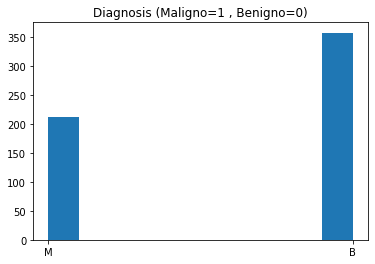

In [ ]:
plt.hist(datos['diagnosis'])
plt.title('Diagnosis (Maligno=1 , Benigno=0)')
plt.show()

## Analisis de correlación

In [ ]:
# Realizare un grafico de correlacion para analizar el problemas de Multicolinealidad que pudieran presentarse
def correlacion(dataframe, grafica=True, matrix=False):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()                   
    if grafica==True:
      fig = plt.figure(figsize = (25, 20))
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm", 
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

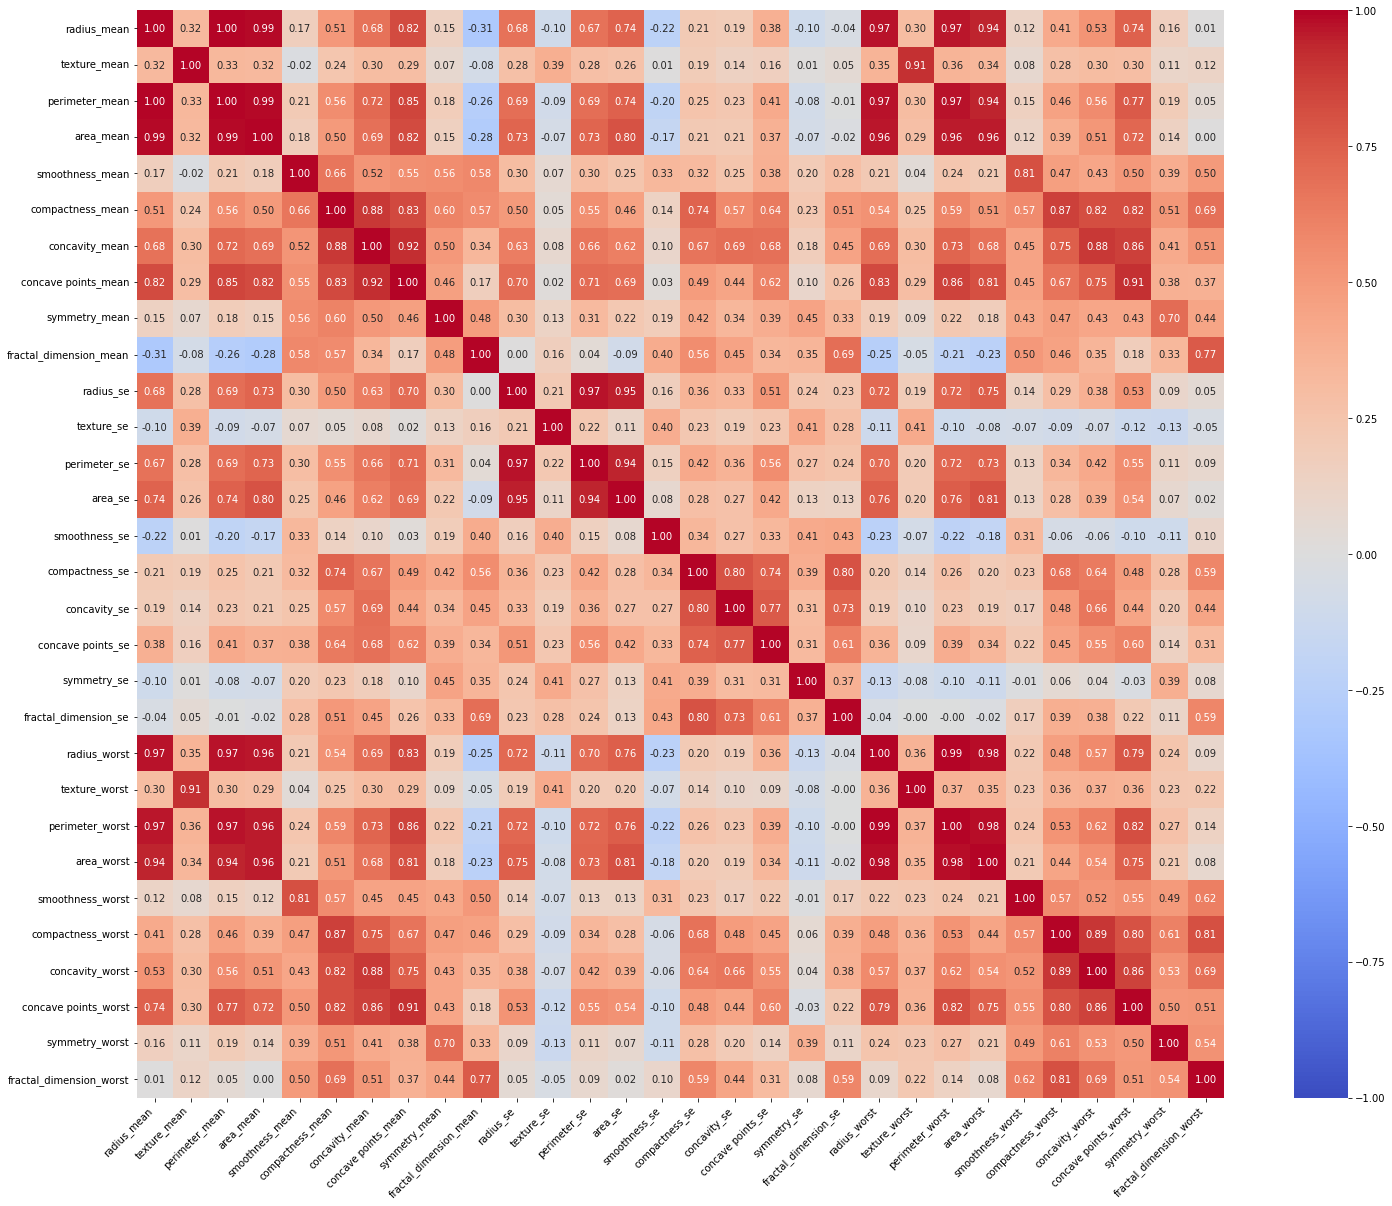

In [ ]:
corr_matrix = correlacion(datos, grafica=True, matrix=True)

El gráfico de correlacion permite observar que hay un alto nivel de correlacion entre varias features, particularmente radius_mean, perimeter_mean y area_mean, asi como estas mismas variables pero con el subindice worst.

Aplicaremos el triangulo superior de la matriz de correlacion con el objeto de eliminar las variables con una correlacion perfecta.

In [ ]:
#Identificar variables redundantes 

# Triangulo superior de la matriz de correlación en números absolutos
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix),1).astype(bool)
triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()


# Encontrar las columnas donde la correlación es 1
borrar = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] > .99999)]

borrar

[]

No se encontraron variables con correlacion perfecta, por lo que no procedimos a remover features. Sin embargo, el utilizar la funcion de activacion Ridge, nos permitira manejar el sobre-ajuste que se pueda presentar.

In [ ]:
#Llevamos la columna de clase (diagnosis) hasta la última posición, por cuestiones de orden en nuestro dataset

cols = datos.columns.tolist()
datos = datos[[c for c in datos if c != 'diagnosis'] + ['diagnosis']]
print(datos.shape)
datos.head()

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


# Regresión Logística sin penalización


## Declaración de variables

In [ ]:
# Declaramos "X" como todas las features disponibles pero substrayendo la columna de "diagnosis"
X=datos.drop('diagnosis', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Convertimos la columna diagnosis a una columna de valores binarios 0 y 1
datos['diagnosis'] = np.where(datos['diagnosis']=='M', 1, 0)
datos['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
# Asignamos "y"
y = datos['diagnosis']

## Normalizacion de datos

La normalización se refiere a cambiar la escala de los features de nuestro modelo a un rango de 0 a 1. Procederemos a realizarla.

In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

NameError: ignored

## Evaluacion del modelo

In [ ]:
# Dividir datos en entrenamiento y prueba
X_train, X_test , y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True,   
                                                     random_state=42
                                                     )

clasificador_rl = LogisticRegression(penalty=None,
                                     random_state=42, 
                                     solver="newton-cg").fit(X_train, y_train)
clasificador_rl.score(X_test, y_test)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [ ]:
def evaluación(modelo, conjunto):
    mensaje_error = 'conjunto solo puede ser "entrenamieonto" o "prueba"'
    assert conjunto in ['entrenamiento', 'prueba'], mensaje_error


    if conjunto == 'entrenamiento':
      X = X_train
      y = y_train
    else:
      X = X_test
      y = y_test    
   

    y_pred = modelo.predict(X)
    precision = accuracy_score(y, y_pred)*100

    # creamos un diccionario con las etiquetas
    data = {'y_Real':  y,
            'y_Prediccion': y_pred
            }
    # lo convertimos en un DataFrame de pandas
    df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

    # hacemos una tabla crusada para obtener la matriz de confusión
    confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'], 
                                   rownames=['Real'], colnames=['Predicción'])

    # realizamos un mapa de calor
    titulo = 'Datos:{}, precisión = {:4.2f}'.format(conjunto, precision)
    sns.heatmap(confusion_matrix, annot=True, fmt='g').set(title = titulo)
    plt.show()

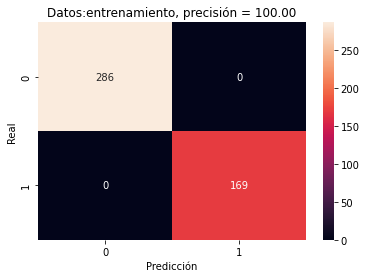

In [ ]:
evaluación(clasificador_rl, 'entrenamiento')

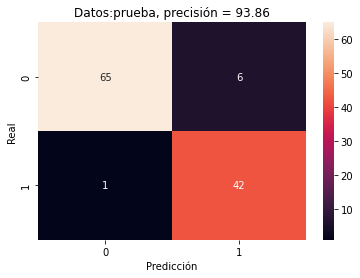

In [ ]:
evaluación(clasificador_rl, 'prueba')

La evaluacion del modelo sin penalización muestra un sobre-ajuste para el set de entrenamiento, y un buen desempeño de 93.86 en el set de entrenamiento. Sin embargo, debido a lo mencionado antes de las variables correlacionadas, aplicare una regresion logistica con regularizacion de tipo L2, en especifico la regularizacion por Ridge.

# Regresión Logística con penalización Ridge

## Estimación de fueza de la regularización (parámetro λ)

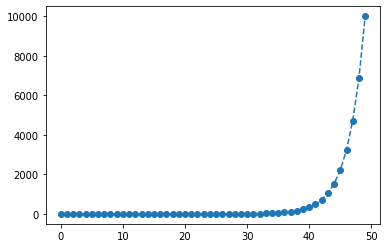

In [ ]:
lambdas = np.logspace( -4, 4, 50)
plt.plot(lambdas, linestyle='--', marker='o')
plt.show()

In [ ]:
lambdas

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LogisticRegression(penalty='l2',solver="newton-cg"), 
                           {'C': 1/lambdas}, cv=5, return_train_score=False)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': array([1.00000000e+04, 6.86648845e+03, 4.71486636e+03, 3.23745754e+03,
       2.22299648e+03, 1.52641797e+03, 1.04811313e+03, 7.19685673e+02,
       4.94171336e+02, 3.39322177e+02, 2.32995181e+02, 1.59985872e+02,
       1.09854114e+02, 7.54312006e+01, 5.17947468e+01, 3.55648031e+01,
       2.44205309e+01, 1.676...
       1.20679264e+00, 8.28642773e-01, 5.68986603e-01, 3.90693994e-01,
       2.68269580e-01, 1.84206997e-01, 1.26485522e-01, 8.68511374e-02,
       5.96362332e-02, 4.09491506e-02, 2.81176870e-02, 1.93069773e-02,
       1.32571137e-02, 9.10298178e-03, 6.25055193e-03, 4.29193426e-03,
       2.94705170e-03, 2.02358965e-03, 1.38949549e-03, 9.54095476e-04,
       6.55128557e-04, 4.49843267e-04, 3.08884360e-04, 2.12095089e-04,
       1.45634848e-04, 1.00000000e-04])})

In [ ]:
grid_search.best_params_

{'C': 0.2682695795279727}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.293744,0.184478,0.003067,0.002291,10000.0,{'C': 10000.0},0.956140,0.929825,0.956140,0.964912,0.973451,0.956094,0.014623,36
1,0.212922,0.066438,0.002041,0.000555,6866.48845,{'C': 6866.488450042998},0.956140,0.929825,0.956140,0.964912,0.982301,0.957864,0.016965,31
2,0.198581,0.052957,0.001873,0.000127,4714.866363,{'C': 4714.866363457394},0.956140,0.929825,0.956140,0.964912,0.982301,0.957864,0.016965,31
3,0.205770,0.093501,0.001758,0.000024,3237.457543,{'C': 3237.4575428176436},0.956140,0.929825,0.956140,0.964912,0.982301,0.957864,0.016965,31
4,0.188098,0.047493,0.002760,0.001559,2222.996483,{'C': 2222.9964825261955},0.947368,0.929825,0.956140,0.964912,0.982301,0.956109,0.017497,35
5,0.220531,0.086899,0.001851,0.000160,1526.417967,{'C': 1526.4179671752333},0.947368,0.929825,0.956140,0.973684,0.982301,0.957864,0.018691,28
6,0.294150,0.016447,0.005634,0.005236,1048.113134,{'C': 1048.1131341546852},0.947368,0.929825,0.956140,0.973684,0.982301,0.957864,0.018691,28
7,0.204826,0.055879,0.002582,0.001232,719.685673,{'C': 719.6856730011522},0.947368,0.929825,0.956140,0.973684,0.982301,0.957864,0.018691,28
8,0.137216,0.030253,0.001729,0.000086,494.171336,{'C': 494.1713361323838},0.947368,0.929825,0.956140,0.973684,0.991150,0.959634,0.021175,26
9,0.135793,0.036469,0.001793,0.000073,339.322177,{'C': 339.32217718953297},0.947368,0.921053,0.956140,0.973684,0.991150,0.957879,0.023776,27


In [ ]:
C = grid_search.best_params_['C']

# valor de lambda
1 / grid_search.best_params_['C']

3.7275937203149385

In [ ]:
clasificador_ridge = LogisticRegression(penalty= 'l2',  
                                        C = C, 
                                        random_state=42, 
                                        solver="newton-cg").fit(X_train, y_train)

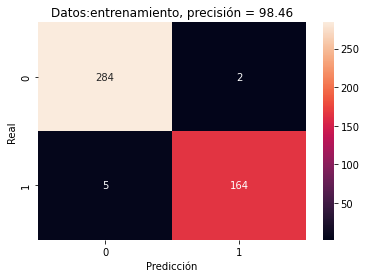

In [ ]:
evaluación(clasificador_ridge, 'entrenamiento')

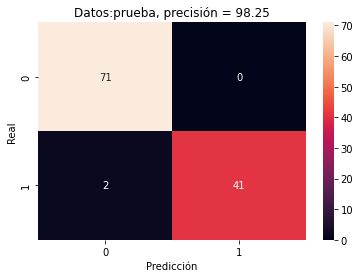

In [ ]:
evaluación(clasificador_ridge, 'prueba')

Corriendo la regresión logística con la penalización Ridge, acabamos con scores casi identicos tanto para el set de entrenamiento, como para el set de prueba.

# Predicciones y certeza de la predicción

In [ ]:
# Se procede a calcular las probabilidades por caso para el dataset.
resultados = {'P(Maligno)' : clasificador_ridge.predict_proba(X_test)[:,0],
              'P(Benigno)' : clasificador_ridge.predict_proba(X_test)[:,1], 
              'y_pred_50' : clasificador_ridge.predict(X_test),          
              }

predicciones = pd.DataFrame(resultados)
predicciones.sort_values('P(Maligno)',
                         ascending=False).iloc[49:100]

,P(Maligno),P(Benigno),y_pred_50
21,0.974759,0.025241,0
75,0.972134,0.027866,0
79,0.972004,0.027996,0
44,0.966395,0.033605,0
53,0.965038,0.034962,0
76,0.954312,0.045688,0
105,0.953892,0.046108,0
69,0.950485,0.049515,0
109,0.943710,0.056290,0
48,0.941261,0.058739,0


In [ ]:
# Realizamos el mismo procedimiento, pero cambiando el valor del hiperparametro a 0.3, lo cual indica que la clasificación de probabilidades
# se esta volviendo mas estricta.
predicciones['y_pred_30'] = np.where( predicciones['P(Maligno)'] > .3, 'Maligno', 'Benigno')
predicciones.sort_values('P(Maligno)',
                         ascending=False).iloc[49:100]

,P(Maligno),P(Benigno),y_pred_50,y_pred_30
21,0.974759,0.025241,0,Maligno
75,0.972134,0.027866,0,Maligno
79,0.972004,0.027996,0,Maligno
44,0.966395,0.033605,0,Maligno
53,0.965038,0.034962,0,Maligno
76,0.954312,0.045688,0,Maligno
105,0.953892,0.046108,0,Maligno
69,0.950485,0.049515,0,Maligno
109,0.943710,0.056290,0,Maligno
48,0.941261,0.058739,0,Maligno


## Grafica ROC

Procedemos a realizar los pasos necesarios para estimar la curva ROC

In [ ]:
def grafica_roc(clf, y_test):
    '''Grafica la curva ROC para el conjunto de prueba'''
    y_test_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve( y_test, y_test_score)
    roc_auc = auc(fpr, tpr)  #Area bajo la curva (AUC, por sus siglas en inglés)
    plt.figure()
    plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % roc_auc)  
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([-0.01, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
ytest_bin = np.where(y_test == 1, 1, 0)

In [ ]:
clf = clasificador_ridge
y_test_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve( ytest_bin, y_test_score)

from sklearn.preprocessing import MinMaxScaler
umbral_decisión = (MinMaxScaler().fit_transform(thresholds.reshape(-1,1)))[:,0]


i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),
                    'tpr' : pd.Series(tpr, index = i), 
                    'd_optimo': pd.Series(np.sqrt((fpr)**2+(1-tpr)**2), index=i),
                    'thresholds' : pd.Series(thresholds, index = i),
                    'umbral_decisión': pd.Series(umbral_decisión, index=i)})
roc

,fpr,tpr,d_optimo,thresholds,umbral_decisión
0,0.000000,0.000000,1.000000,2.000000,1.000000
1,0.000000,0.023256,0.976744,1.000000,0.499996
2,0.000000,0.976744,0.023256,0.480060,0.240024
3,0.098592,0.976744,0.101297,0.137779,0.068882
4,0.098592,1.000000,0.098592,0.135569,0.067777
5,1.000000,1.000000,1.000000,0.000017,0.000000


In [ ]:
roc_ = roc.loc[1:56,:] # quitamos el primer y último renglón.

In [ ]:
roc_[roc_['d_optimo']==roc_['d_optimo'].min()]

,fpr,tpr,d_optimo,thresholds,umbral_decisión
2,0.0,0.976744,0.023256,0.48006,0.240024


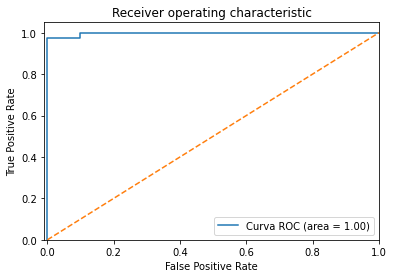

In [ ]:
grafica_roc(clasificador_ridge, ytest_bin)

Al parecer la grafica ROC, asi como los scores obtenidos en la matrices de confusion obtenidas para el set de entrenamiento y de prueba, indican que el modelo sobre-ajusta.

# Magnitud de los coeficientes para ambos modelos

In [ ]:
clasificador_rl.coef_[0].shape

(30,)

In [ ]:
# Estimo los coeficientes del modelo sin regularización.
coeficientes_rl = pd.Series(clasificador_rl.coef_[0], 
                            index=datos.columns[0:30],
                            name='Sin regularización').sort_values(ascending=False)
coeficientes_rl

radius_se                  195.297593
concave points_mean        162.996334
concavity_mean             115.347449
radius_worst               106.020471
symmetry_worst              99.007560
area_worst                  84.155472
fractal_dimension_mean      82.396817
concavity_worst             70.232526
concave points_se           52.069718
compactness_se              51.966249
area_mean                   34.724933
texture_mean                33.920094
concave points_worst        33.640127
compactness_worst           31.469811
texture_worst               21.533571
smoothness_se               12.326202
texture_se                  -5.176597
smoothness_mean            -13.033254
smoothness_worst           -15.412653
area_se                    -26.758670
radius_mean                -27.561294
symmetry_mean              -31.431587
fractal_dimension_worst    -41.471272
perimeter_mean             -48.143441
symmetry_se                -58.588008
fractal_dimension_se       -62.357817
perimeter_se

In [ ]:
coeficientes_rl.min(), coeficientes_rl.max()

(-212.77113770866555, 195.29759277855953)

In [ ]:
# Estimo los coeficientes del modelo utilizando la regularización Ridge
coeficientes_ridge = pd.Series(clasificador_ridge.coef_[0],
                               index=datos.columns[0:30],
                               name='Ridge').sort_values(ascending=False)
coeficientes_ridge

texture_worst              0.849510
symmetry_worst             0.727251
radius_se                  0.724457
concave points_mean        0.647156
radius_worst               0.629705
concavity_worst            0.599219
concave points_worst       0.590912
area_worst                 0.575749
area_se                    0.534778
perimeter_worst            0.519664
concavity_mean             0.517884
smoothness_worst           0.480995
texture_mean               0.479033
perimeter_se               0.456751
area_mean                  0.425294
radius_mean                0.424533
perimeter_mean             0.404996
concave points_se          0.187536
smoothness_se              0.147401
fractal_dimension_worst    0.136382
smoothness_mean            0.130939
compactness_worst          0.110289
symmetry_mean             -0.052616
concavity_se              -0.062578
texture_se                -0.072970
compactness_mean          -0.151406
fractal_dimension_mean    -0.206353
symmetry_se               -0

In [ ]:
# Observamos las magnitudes de los coeficientes del modelo, importante notar que la regularización Ridge no mpermite que los coeficientes tomen valores demasiado altos.
coef = pd.concat([coeficientes_rl,coeficientes_ridge], axis=1)
coef

,Sin regularización,Ridge
radius_se,195.297593,0.724457
concave points_mean,162.996334,0.647156
concavity_mean,115.347449,0.517884
radius_worst,106.020471,0.629705
symmetry_worst,99.007560,0.727251
area_worst,84.155472,0.575749
fractal_dimension_mean,82.396817,-0.206353
concavity_worst,70.232526,0.599219
concave points_se,52.069718,0.187536
compactness_se,51.966249,-0.444554


In [ ]:
# Importancia de los features para predecir si las celdas son Benignas o Malignas.
np.exp(coef).sort_values(by='Ridge')

,Sin regularización,Ridge
compactness_se,3.703867e+22,0.641110
fractal_dimension_se,8.285990e-28,0.677730
symmetry_se,3.593779e-26,0.745225
fractal_dimension_mean,6.088117e+35,0.813546
compactness_mean,3.932502e-93,0.859498
texture_se,5.647192e-03,0.929629
concavity_se,3.630029e-43,0.939340
symmetry_mean,2.235812e-14,0.948744
compactness_worst,4.646921e+13,1.116601
smoothness_mean,2.186401e-06,1.139898
